# COVID-19 & Health Predictor 

#### - Data Bootcamp Final Project
##### - Cordell, Gibbs, Miller, Ross

# Purpose: 
### Analyze COVID-19 Positivity or Negativity Based on Correlation to Nutrition

# Model: Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression

## Library & Dependency Installation

In [42]:
# Scikit-Learn Libraries/Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [7]:
# Data Frame & Data Manipulation Libraries/Dependencies
import pandas as pd

## Loading the Data

#### Physical Path Import

In [44]:
# Create File Path
file_path = "https://raw.githubusercontent.com/sterlingvm/Data_Bootcamp_Project/projectrepo/final_joined_data.csv"

# Build the Dataframe
dataframe = pd.read_csv(file_path)

In [45]:
# Preview the Data
dataframe.head(130)

,COUNTRY,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,...,Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished
0,Albania,Europe,275416,9570.366,225,7.818,44,3497,121.516,1,...,6.7861,1.8845,15.7213,1.5367,0.1515,0.3261,11.7753,31.2304,22.3,6.2
1,Algeria,Africa,265800,606.143,18,0.041,0,6875,15.678,0,...,6.3801,1.1305,7.6189,1.8342,0.1152,1.0310,11.6484,40.3651,26.6,3.9
2,Angola,Africa,99287,302.094,0,0.000,0,1900,5.781,0,...,6.0005,2.0571,0.8311,1.8495,0.0061,0.6463,2.3041,45.0722,6.8,25.0
3,Argentina,Americas,9101319,20137.544,17646,39.043,0,128729,284.825,76,...,6.0435,7.0421,10.2328,3.0536,0.0200,0.9541,4.3503,30.6559,28.5,4.6
4,Armenia,Europe,422900,14271.570,23,0.776,0,8623,291.000,1,...,6.0989,2.2675,9.9407,2.6579,0.1108,0.4705,16.7019,36.4358,20.9,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Uruguay,Americas,902540,25981.870,2817,81.094,0,7213,207.644,3,...,5.3746,3.7863,12.3906,3.4102,0.0131,1.0337,3.9333,32.1076,28.9,0.0
126,Uzbekistan,Europe,238747,713.333,111,0.332,4,1637,4.891,0,...,5.2150,1.8621,11.7952,0.5796,0.0649,0.6109,14.8354,35.5540,15.3,6.3
127,Vanuatu,Western Pacific,8063,2625.144,466,151.720,0,14,4.558,1,...,5.8103,2.7466,1.2692,1.3645,0.0038,0.3674,3.9175,43.3737,23.5,7.2
128,Venezuela (Bolivarian Republic of),Americas,522749,1838.339,235,0.826,0,5709,20.077,0,...,7.6460,3.8328,9.3920,3.4106,0.0009,1.3734,4.1474,35.2416,25.2,21.2


## Connect to Database

In [2]:
# Install Postgres Driver
!wget https://jdbc.postgresql.org/download/postgresql-42.2.16.jar

zsh:1: command not found: wget


##### Build Database Connection

In [11]:
# Import Module to Communicate with PostgreSQL
import psycopg2 as pg

# Import Password Protector
from getpass import getpass
passw = getpass('Enter your Password')

# Build Engine for Connection
engine = pg.connect(database="Final_Project",  user="postgres", host="localhost", port="5432", password=passw)

dataframe = pd.read_sql('SELECT covid.*, nutrition."Alcoholic Beverages",nutrition."Animal Products",nutrition."Cereals - Excluding Beer",nutrition."Eggs",nutrition."Fish, Seafood",nutrition."Fruits - Excluding Wine",nutrition."Meat",nutrition."Milk - Excluding Butter",nutrition."Sugar & Sweeteners",nutrition."Treenuts",nutrition."Vegetable Oils",nutrition."Vegetables",nutrition."Vegetal Products",nutrition."Obesity",nutrition."Undernourished" FROM covid INNER JOIN nutrition ON covid."COUNTRY" = nutrition."COUNTRY" ORDER BY "COUNTRY";', con=engine)

In [12]:
dataframe.head()

,index,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,...,cinematography,editors,writers,composers,based_on,index,userId,movieId,rating,timestamp
0,0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,None,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.0,...,Oliver Wood,Michael Tronick,"{""David Arnott"",""James Cappe""}","{""Cliff Eidelman"",Yello}","{Characters,""by Rex Weiner""}",0,1,110,1.0,1425941529
1,1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,None,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.0,...,Mark Plummer,Howard E. Smith,"{""James Foley"",""Robert Redlin""}",Maurice Jarre,"{""the novel"",""After Dark, My Sweet"",by,""Jim Th...",1,1,147,4.5,1425942435
2,2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,None,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.0,...,Roger Deakins,"{""John Bloom"",""Lois Freeman-Fox""}","{""John Eskow"",""Richard Rush""}",Charles Gross,"{""Air America"",by,""Christopher Robbins""}",2,1,858,5.0,1425941523
3,3,tt0099012,8217,Alice,Alice,None,None,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.0,...,Carlo Di Palma,Susan E. Morse,Woody Allen,None,None,3,1,1221,5.0,1425941546
4,4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,None,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.0,...,Russell Boyd,David Stiven,Paul Hogan,Maurice Jarre,None,4,1,1246,5.0,1425941556


In [48]:
# # Import Module to Communicate with PostgreSQL
# import psycopg2

# # Connection parameters - yours will be different
# param_dic = {
#     "host"      : "localhost",
#     "database"  : "globaldata",
#     "user"      : "myuser",
#     "password"  : "Passw0rd"
# }

# # Define the connection function
# def connect(params_dic):
#     """ Connect to the PostgreSQL database server """
#     conn = None
#     try:
#         # connect to the PostgreSQL server
#         print('Connecting to the PostgreSQL database...')
#         conn = psycopg2.connect(**params_dic)
#     except (Exception, psycopg2.DatabaseError) as error:
#         print(error)
#         sys.exit(1) 
#     print("Connection successful")
#     return conn


In [49]:
# # Connect to Database
# connect(param_dic)

##### Retrieve Table/DataFrame from Database

In [50]:
# # Define our Data Table Retreival Function
# def postgresql_to_dataframe(conn, select_query, column_names):
#     """
#     Tranform a SELECT query into a pandas dataframe
#     """
#     cursor = conn.cursor()
#     try:
#         cursor.execute(select_query)
#     except (Exception, psycopg2.DatabaseError) as error:
#         print("Error: %s" % error)
#         cursor.close()
#         return 1
    
#     # Naturally we get a list of tupples
#     tupples = cursor.fetchall()
#     cursor.close()
    
#     # We just need to turn it into a pandas dataframe
#     df = pd.DataFrame(tupples, columns=column_names)
#               # *** Potentially change this ^ so that we don't have to input column names by hand ***
#     return df

In [51]:
# # Retreive Data
# postgresql_to_dataframe(conn, select_query, column_names)

# # Rename DataFrame Variable
# dataframe = df

## Process & Preprocess the Data

### Clean the Data

##### Identify Categorical Variables/Columns

In [52]:
# Generate our categorical variable list
categorical_columns = dataframe.dtypes[dataframe.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
dataframe[categorical_columns].nunique()

COUNTRY               131
WHO Region              6
ISO3                  131
WHO_REGION              6
DATA_SOURCE             1
DATE_UPDATED           16
VACCINES_USED          80
FIRST_VACCINE_DATE     67
dtype: int64

In [53]:
dataframe.columns

Index(['COUNTRY', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours', 'Case_Fatality_Ratio',
       'ISO3', 'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED',
       'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'VACCINES_USED', 'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED',
       'PERSONS_BOOSTER_ADD_DOSE', 'PERSONS_BOOSTER_ADD_DOSE_PER100',
       'Alcoholic Be

In [54]:
droppable = ["WHO Region", "COUNTRY", "ISO3", "WHO_REGION", "DATA_SOURCE", "DATE_UPDATED", "VACCINES_USED", "FIRST_VACCINE_DATE", "Undernourished"]

##### Determing Bucketing - if categorical column has more than 10 unique values, consider binning!


In [55]:
## OPTIONAL ##

## Analyze frequencies of unique values in categorical column(s)
# column1_counts = dataframe.insert_column_name_here.value_counts()

## Plot the value counts - then determine the cut off(s) for binning
# column1_counts.plot.density()

In [56]:
## OPTIONAL ##

## Determine which values to replace
# replace_column1 = list(column1_counts[column1_counts < cutoff_value].index)

## Replace the column values you'd like to bucket together in the DataFrame
# for value in replace_column1:
  # dataframe.insert_column_name_here = dataframe.insert_column_name_here.replace(value,"New_Bucketed_Value_Name-Ex:'Other'")

## Check to make sure the bucketing/binning was successful
# dataframe.insert_column_name_here.value_counts()

##### Encode the Categorical Values

In [57]:
# Import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [58]:
# # Instantiate LabelEncoder
# encoder = LabelEncoder()

# # Create a copy of the dataframe and encode the data
# dataframe_copy = dataframe.copy()

# # Train the LabelEncoder, convert the text columns to string columns
# for x in categorical_columns:
#   dataframe_copy[f"{x}"] = encoder.fit_transform(dataframe_copy[f"{x}"])

# # Preview the converted tables
# dataframe_copy.head(15)

### Dataset Training & Test Splitting

##### Separate Features from Outcomes

##### Features(X)

In [59]:
# Create Features Dataset
# X = dataframe_copy.copy()

X = dataframe.copy()
X = X.drop(["WHO Region", "COUNTRY", "ISO3", "WHO_REGION", "DATA_SOURCE", "DATE_UPDATED", "VACCINES_USED", "FIRST_VACCINE_DATE", "Case_Fatality_Ratio"], axis=1)

# Preview the Dataset
X.head(15)

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,...,Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished
0,275416,9570.366,225,7.818,44,3497,121.516,1,0.035,0,...,6.7861,1.8845,15.7213,1.5367,0.1515,0.3261,11.7753,31.2304,22.3,6.2
1,265800,606.143,18,0.041,0,6875,15.678,0,0.000,0,...,6.3801,1.1305,7.6189,1.8342,0.1152,1.0310,11.6484,40.3651,26.6,3.9
2,99287,302.094,0,0.000,0,1900,5.781,0,0.000,0,...,6.0005,2.0571,0.8311,1.8495,0.0061,0.6463,2.3041,45.0722,6.8,25.0
3,9101319,20137.544,17646,39.043,0,128729,284.825,76,0.168,0,...,6.0435,7.0421,10.2328,3.0536,0.0200,0.9541,4.3503,30.6559,28.5,4.6
4,422900,14271.570,23,0.776,0,8623,291.000,1,0.034,0,...,6.0989,2.2675,9.9407,2.6579,0.1108,0.4705,16.7019,36.4358,20.9,4.3
5,6328508,24817.791,305766,1199.088,48015,7565,29.667,254,0.996,49,...,4.1883,6.7049,12.1018,2.5364,0.3176,1.2798,5.1406,28.5806,30.4,0.0
6,4231050,47534.205,36813,413.580,4787,19816,222.625,51,0.573,3,...,4.6069,4.6810,12.3776,2.6094,0.2367,0.8109,5.1098,30.4338,21.9,0.0
7,792638,7817.579,53,0.523,6,9709,95.757,0,0.000,0,...,4.7988,2.1513,8.3212,1.5523,0.1906,0.2235,10.0755,38.3584,19.9,0.0
8,1952855,1185.781,112,0.068,0,29127,17.686,0,0.000,0,...,2.8655,0.4191,1.8778,0.9285,0.0934,0.7615,3.6405,44.8033,3.4,14.7
9,73856,25700.217,3363,1170.248,264,430,149.630,32,11.135,24,...,5.8723,5.8477,2.2041,4.3344,0.0852,0.8677,5.4725,37.5167,24.8,3.9


##### Outcomes (y)

In [60]:
# Create Outcomes Dataset
y = dataframe["Case_Fatality_Ratio"]

# Preview the data
y.head(15)

0     1.269711
1     2.586518
2     1.913643
3     1.414398
4     2.039019
5     0.119539
6     0.468347
7     1.224893
8     1.491506
9     0.582213
10    0.709968
11    0.769853
12    1.172084
13    0.878512
14    2.172394
Name: Case_Fatality_Ratio, dtype: float64

#### Create Training & Testing Splits

In [61]:
# Split Data into Training & Testing (Default: 75%/25% Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=615, train_size=None)

# | Change the split % by editting the "train_size parameter to your training split percentage" |
      # Example: train_size = 0.80 results in an 80%/20% split

In [62]:
# Preview the shapes of the Split Datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(98, 34)
(33, 34)
(98,)
(33,)


#### Standardizing/Scaling the Data

In [63]:
# Instantiate the Scaler
scaler = StandardScaler()

In [64]:
# Fit/Train Scaler to the Training Data
X_scaler = scaler.fit(X_train)

In [65]:
# Scale / Transform the X data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Apply the Model

#### Instantiate, Fit, & Evaluate the Model

In [66]:
# Instantiate the Model
lr_model = LinearRegression()

In [67]:
# Fit the Model to the Training Data
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [79]:
# Create predictions with the model using X_test Data.
y_pred = lr_model.predict(X_test)

# View the Data
print(y_pred)

[5.39714887e+05 2.17089028e+06 1.42307859e+05 2.96722936e+06
 1.61167199e+07 8.77749025e+07 4.24419393e+07 1.72991703e+06
 2.01251498e+08 5.86216891e+07 2.72273525e+07 4.08070058e+05
 2.82353034e+06 1.61121477e+06 6.04033276e+06 1.92026660e+07
 2.89917471e+06 1.64333657e+06 1.33702321e+07 8.16372710e+05
 4.91573051e+07 1.04636378e+07 4.44782924e+06 5.00692702e+05
 3.38408300e+05 1.19895487e+07 5.57326887e+08 2.29931925e+05
 1.06538303e+08 7.13189194e+05 2.58204743e+06 8.12941258e+08
 2.94646247e+06]


#### Evaluate the Model

In [69]:
# Import the Evaluation Metrics & Dependencies
import matplotlib.pyplot as plt

##### Display Evaluation

In [70]:
print(f'model score on training data: {lr_model.score(X_train, y_train)}')
print(f'model score on testing data: {lr_model.score(X_test, y_test)}')

model score on training data: -3.873043065968301e+16
model score on testing data: -2.148355890631307e+16


In [71]:
# Use R2 Score to determine the model's validity
score = lr_model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: -3.4047149226145132e+16


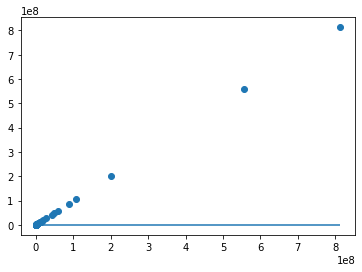

In [72]:
# Plot the results. The best fit line is red.
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()


## Determining Findings

In [ ]:
# Run model on all data to determine overall outcomes for all countries
predictions = lr_model.predict(X)

# Preview the data
print(predictions)

In [ ]:
# Add column to dataset
dataframe['Predicted Correlations'] = predictions

## Results & Takeaways

#### Model Effectiveness & Applications Summary

*Insert Model Summary & Results Write-Up Here*

#### Feature Importances & *Weights*

In [73]:
import numpy as np

In [74]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score

In [75]:
def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance

In [76]:
# Create a sorted list of features from most important to overall outcome to least important!
def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

In [77]:
def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

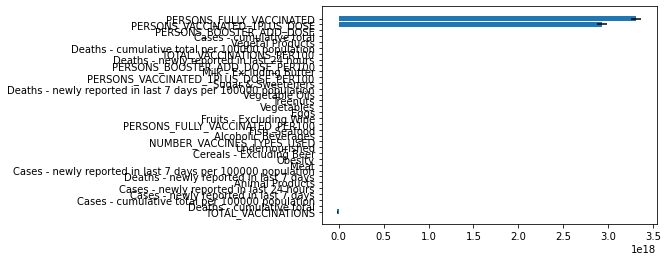

In [78]:
perm_importance_result_train = permutation_importance(
    lr_model, X_train, y_train, n_repeats=10)

plot_feature_importances(perm_importance_result_train, X_train.columns)

*Insert Feature Importances Summary & Results Write-Up Here*

## Exports

In [ ]:
# Export Final Dataframe to CSV for Tranferability to stakeholders and non-coding partners
dataframe.to_csv('final_covid_nutrition_fatality_calculations.csv', index=False)